In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("archivos-ejercicios/world_data_full_apply_nulos.csv", index_col = 0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


1) Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo

In [7]:
# Media

df_media = df.mean(numeric_only=True)
df_media

density                                 1.345045e+02
agricultural_land                       3.911755e+01
land_area                               2.552127e+02
armed_forces_size                       1.037831e+02
birth_rate                              2.021497e+01
calling_code                            3.605464e+02
co2-emissions                           1.259155e+02
cpi                                     1.441936e+02
cpi_change                              6.722346e+00
fertility_rate                          2.698138e+00
forested_area                           3.201543e+01
gasoline_price                          1.002457e+00
gdp                                     4.772959e+11
gross_primary_education_enrollment      1.024702e+02
gross_tertiary_education_enrollment     3.796339e+01
infant_mortality                        2.133280e+01
life_expectancy                         7.227968e+01
maternal_mortality_ratio                1.603923e+02
minimum_wage                            2.1941

In [ ]:
# Mediana 

df_mediana = df.median(numeric_only=True)
df_mediana

density                                 8.300000e+01
agricultural_land                       3.960000e+01
land_area                               1.484600e+02
armed_forces_size                       2.850000e+01
birth_rate                              1.795000e+01
calling_code                            2.555000e+02
co2-emissions                           3.447700e+01
cpi                                     1.247400e+02
cpi_change                              2.300000e+00
fertility_rate                          2.245000e+00
forested_area                           3.200000e+01
gasoline_price                          9.800000e-01
gdp                                     3.438723e+10
gross_primary_education_enrollment      1.025500e+02
gross_tertiary_education_enrollment     3.120000e+01
infant_mortality                        1.400000e+01
life_expectancy                         7.320000e+01
maternal_mortality_ratio                5.300000e+01
minimum_wage                            1.0450

In [8]:
# desviación 

df_dv = df.std(numeric_only=True)

df_dv

density                                 1.573068e+02
agricultural_land                       2.178305e+01
land_area                               2.583850e+02
armed_forces_size                       1.671580e+02
birth_rate                              9.945774e+00
calling_code                            3.232364e+02
co2-emissions                           1.817949e+02
cpi                                     5.478400e+01
cpi_change                              2.445041e+01
fertility_rate                          1.282267e+00
forested_area                           2.379133e+01
gasoline_price                          3.688585e-01
gdp                                     2.172173e+12
gross_primary_education_enrollment      1.315161e+01
gross_tertiary_education_enrollment     2.926102e+01
infant_mortality                        1.954806e+01
life_expectancy                         7.483661e+00
maternal_mortality_ratio                2.335020e+02
minimum_wage                            2.9707

In [12]:
# minimo y maximo 

df_min = df.min(numeric_only=True)
df_max = df.max(numeric_only=True)

print(df_min,'\n', '------------------','\n',df_max)

density                                 1.265000e+00
agricultural_land                       6.000000e-01
land_area                               0.000000e+00
armed_forces_size                       0.000000e+00
birth_rate                              5.900000e+00
calling_code                            1.000000e+00
co2-emissions                           1.016000e+00
cpi                                     9.903000e+01
cpi_change                             -4.300000e+00
fertility_rate                          9.800000e-01
forested_area                           0.000000e+00
gasoline_price                          0.000000e+00
gdp                                     4.727146e+07
gross_primary_education_enrollment      2.340000e+01
gross_tertiary_education_enrollment     8.000000e-01
infant_mortality                        1.400000e+00
life_expectancy                         5.280000e+01
maternal_mortality_ratio                2.000000e+00
minimum_wage                            1.0000

2) Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [13]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [21]:
filtro = df['density'].max()

In [48]:
# Con la mayor densidad

pais_maior= df[(df['density'] == df['density'].max())].loc[:, 'country']


In [49]:
pais_maior.to_frame(name='country')

,country
133,Palestinian National Authority


In [43]:
# Con la menor densidad

pais_menor= df[(df['density'] == df['density'].min())].loc[:, 'country']

In [44]:
pais_menor.to_frame(name='country')

,country
13,Bangladesh


3) Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [51]:
# media de la natalidad

media_natalidad = df['birth_rate'].mean()
media_natalidad

20.214973544973546

4) Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

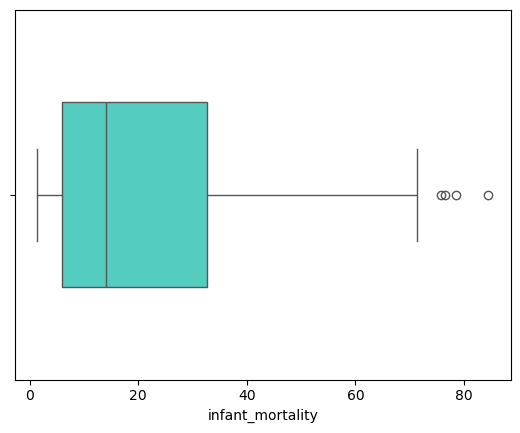

In [54]:
sns.boxplot(x = "infant_mortality", 
            data = df, 
            width = 0.5, 
            color = "turquoise" 
            );

<Axes: xlabel='infant_mortality', ylabel='country'>

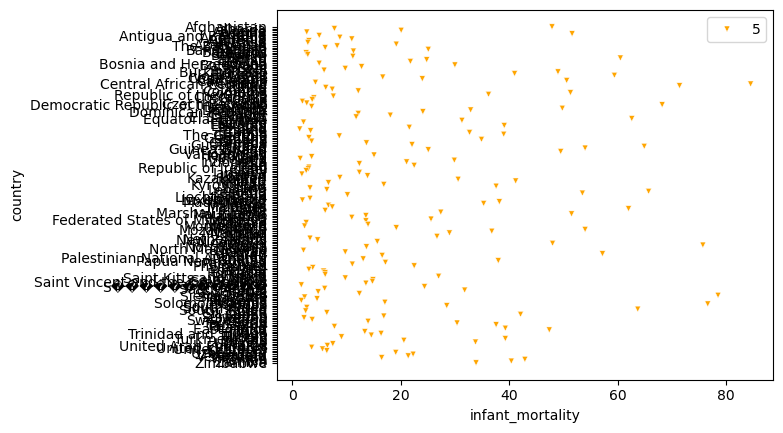

In [55]:
sns.scatterplot(x = "infant_mortality", 
                y = "country", 
                data = df, 
                size = 5, 
                marker= "v", 
                color = "orange")


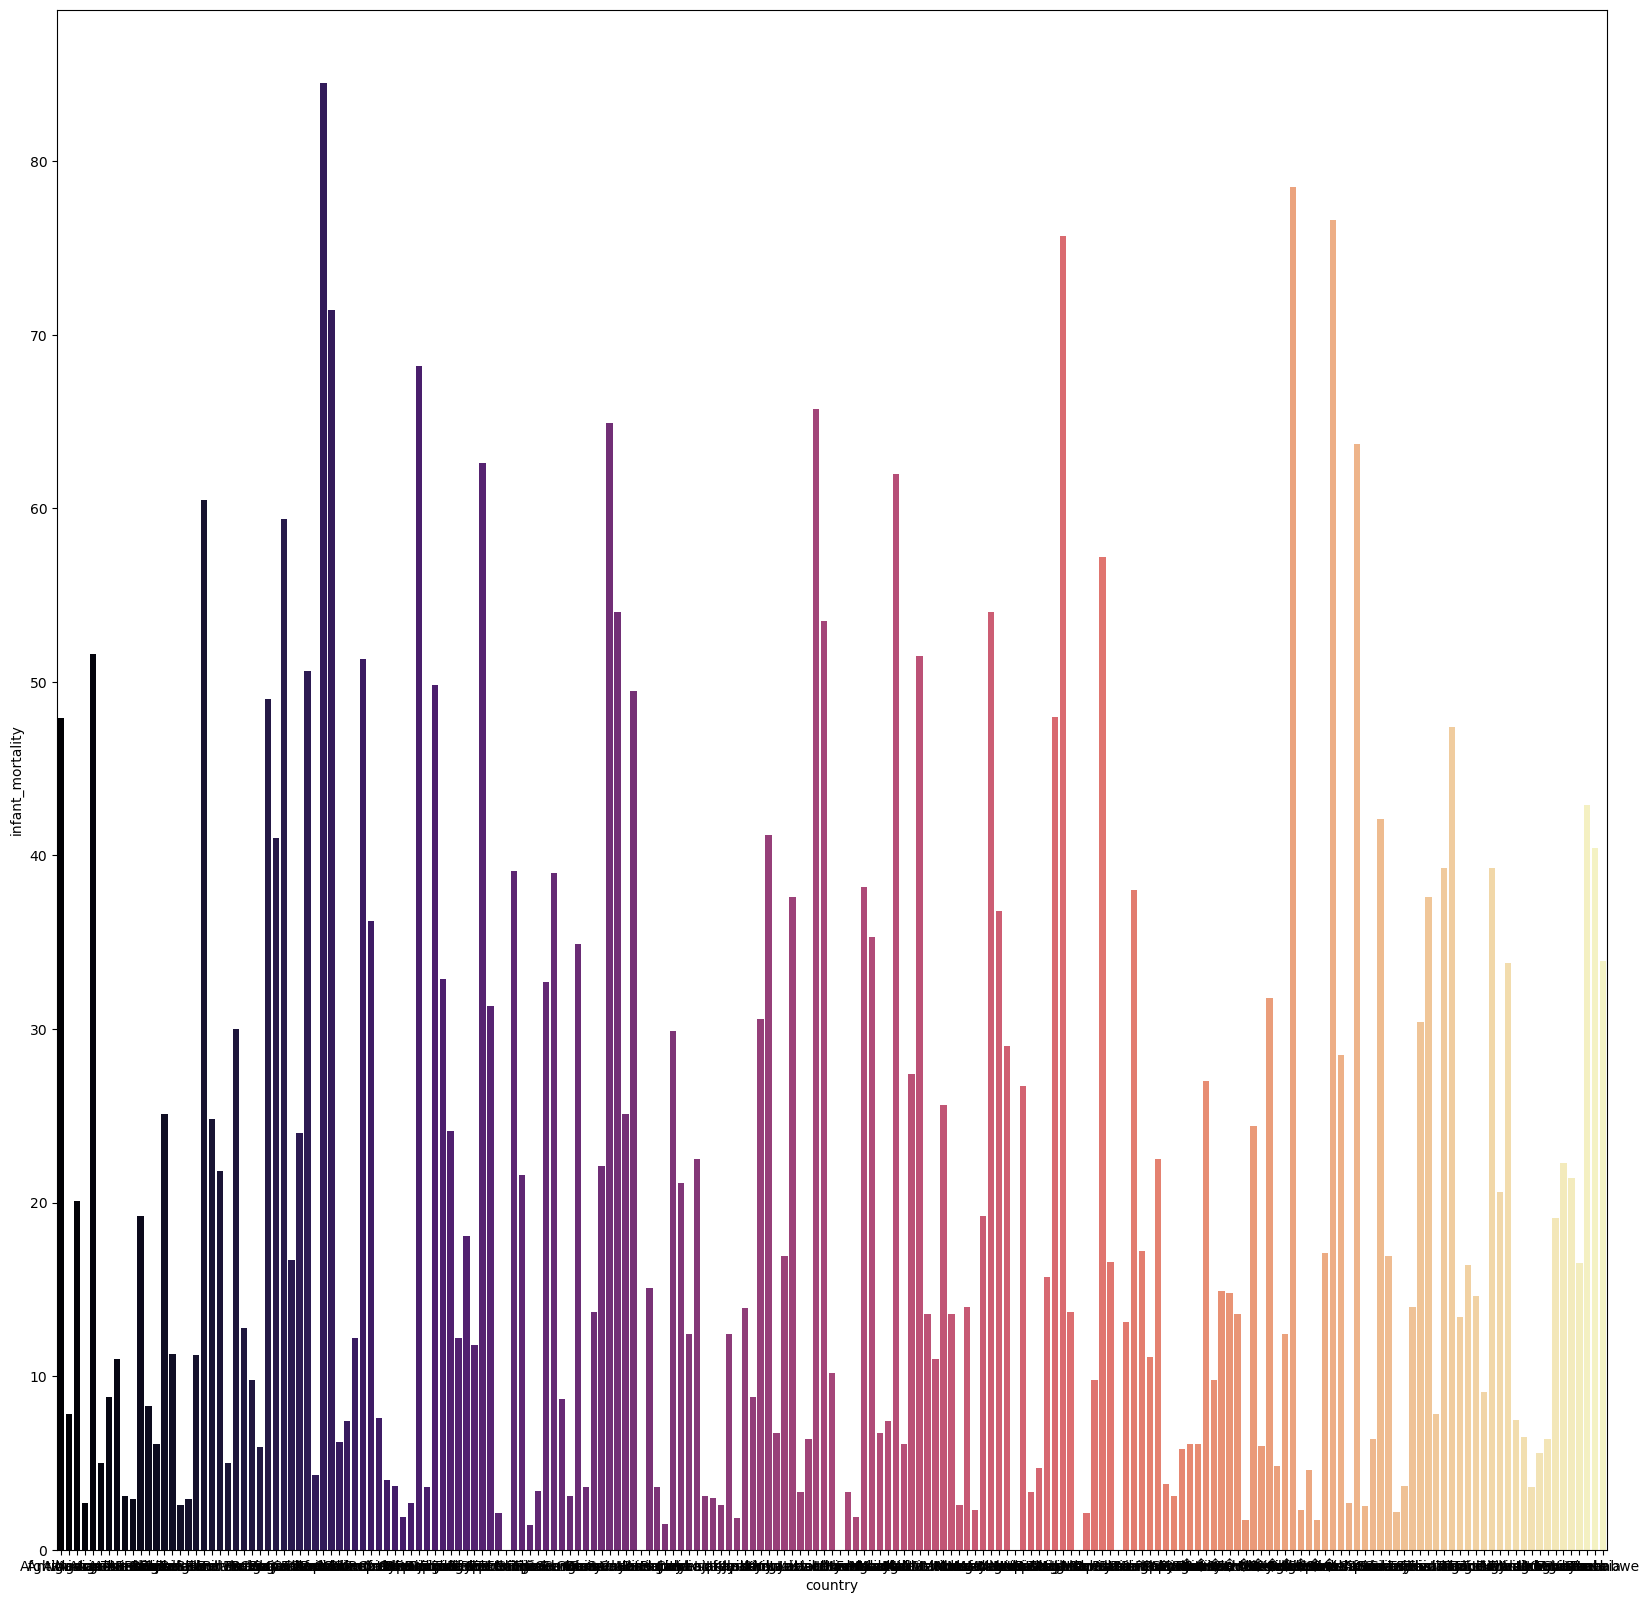

In [62]:
fig = plt.subplots(figsize = (20,20))
sns.barplot(y = "infant_mortality", 
            x = "country", 
            data = df, 
            palette = "magma");

In [66]:
# Calcular los percentiles
low_threshold = df['infant_mortality'].quantile(0.33)  # Percentil 33
high_threshold = df['infant_mortality'].quantile(0.66)  # Percentil 66

# Clasificar los países
def classify_mortality(value):
    if value <= low_threshold:
        return 'Baja'
    elif value <= high_threshold:
        return 'Moderada'
    else:
        return 'Alta'

df['categoria_mortalidad'] = df['infant_mortality'].apply(classify_mortality)

# print(df['country','categoria_mortalidad'])

In [67]:
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,categoria_mortalidad
0,Alta,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia,Alta
1,Moderada,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe,Moderada
2,Moderada,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa,Moderada
3,Baja,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe,Baja
4,Alta,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa,Alta


In [70]:
df[['country','infant_mortality','categoria_mortalidad']]

,country,infant_mortality,categoria_mortalidad
0,Alta,47.9,Alta
1,Moderada,7.8,Moderada
2,Moderada,20.1,Moderada
3,Baja,2.7,Baja
4,Alta,51.6,Alta
...,...,...,...
190,Moderada,21.4,Moderada
191,Moderada,16.5,Moderada
192,Alta,42.9,Alta
193,Alta,40.4,Alta


In [71]:
# Con loc 

df.loc[:, ['country','infant_mortality','categoria_mortalidad']]

,country,infant_mortality,categoria_mortalidad
0,Alta,47.9,Alta
1,Moderada,7.8,Moderada
2,Moderada,20.1,Moderada
3,Baja,2.7,Baja
4,Alta,51.6,Alta
...,...,...,...
190,Moderada,21.4,Moderada
191,Moderada,16.5,Moderada
192,Alta,42.9,Alta
193,Alta,40.4,Alta


In [ ]:
# Otra opción para la solución


etiquetas = ['Baja', 'Moderada', 'Alta']

df['cat_mortalidad'] = pd.cut(df['infant_mortality'], bins=3, labels=etiquetas)

df[['country','cat_mortalidad']]

,country,cat_mortalidad
0,Alta,Moderada
1,Moderada,Baja
2,Moderada,Baja
3,Baja,Baja
4,Alta,Moderada
...,...,...
190,Moderada,Baja
191,Moderada,Baja
192,Alta,Moderada
193,Alta,Moderada


5) Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [ ]:
df.info()

<Axes: xlabel='fertility_rate', ylabel='life_expectancy'>

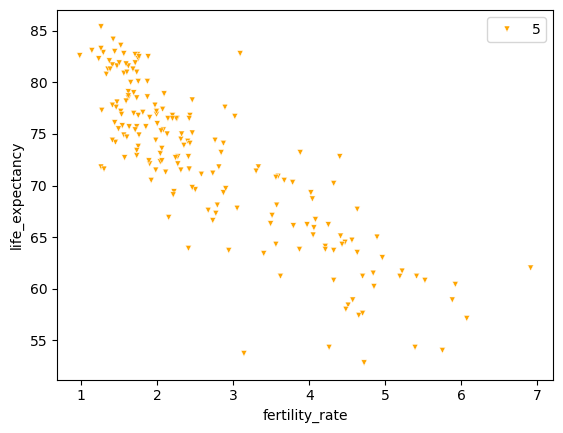

In [73]:
sns.scatterplot(x = "fertility_rate", 
                y = "life_expectancy", 
                data = df, 
                size = 5, 
                marker= "v", 
                color = "orange")

In [ ]:
# es una correlación lineal, asío que utilizaremos el method de Pearson


df_correlaciones = df[['fertility_rate','life_expectancy']].corr( method = "pearson", numeric_only=True)
df_correlaciones

# Interpretación: Tienen una correlación negativa fuerte, o sea, cuanto más alta la tasa de fertilidad de un país menor sera su esperanza de vida. 


,fertility_rate,life_expectancy
fertility_rate,1.000000,-0.849153
life_expectancy,-0.849153,1.000000


**BONUS**

6) Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

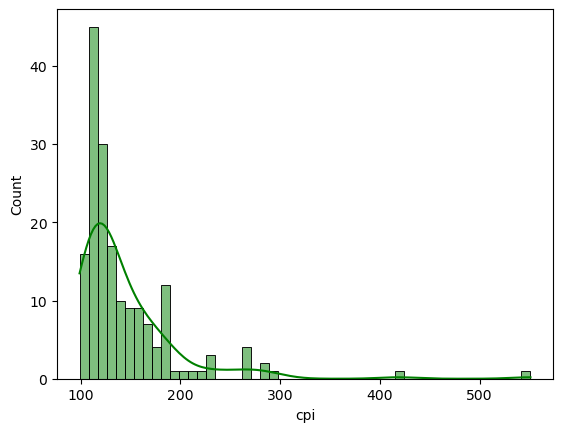

In [75]:
sns.histplot(x = "cpi", 
             data = df, 
             color = "green", 
             kde = True, 
             bins = 50 );